## Transmisor 

# Señal de audio
- Señal de audio en funcion del tiempo
- Espectro de la señal de audio
- Caracterisiticas de la señal de audio 

In [50]:
#Importamos las librerias necesarias 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

#Subimos de nivel la carpeta para importar las funciones de otros archivos 
import sys 
sys.path.append("..")

In [2]:
#Tendremos el archivo .wav, obtendremos sus caracterisiticas 

from modules.caracteristicas import Audio_Caracteristicas
ruta = "../datos/audio_prueba.wav"
Audio_Caracteristicas(ruta) 

Canales: 1
Bits por muestra: 16
Frecuencia de muestreo: 24000 Hz
Duración: 4.66 segundos


(1, 16, 24000, 111744, 4.656)

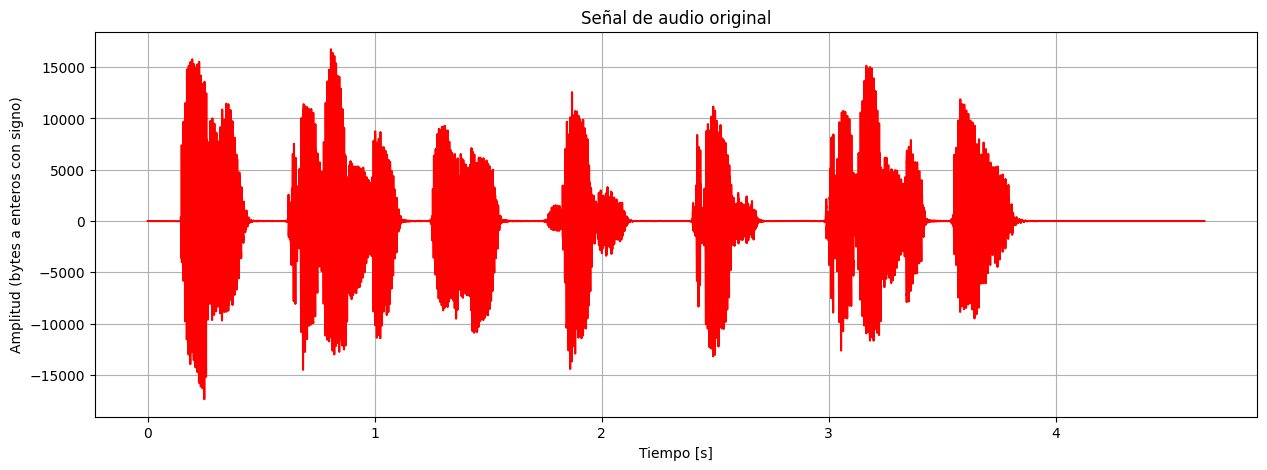

In [6]:
# usamos la funcion del archivo caracterisiticas.py
from importlib import reload
import modules.caracteristicas
reload(modules.caracteristicas)
from modules.caracteristicas import Audio_Grafica
#graficamos la señal
audio,t_audio=Audio_Grafica(ruta)

# Normalizamos a niveles de tension 

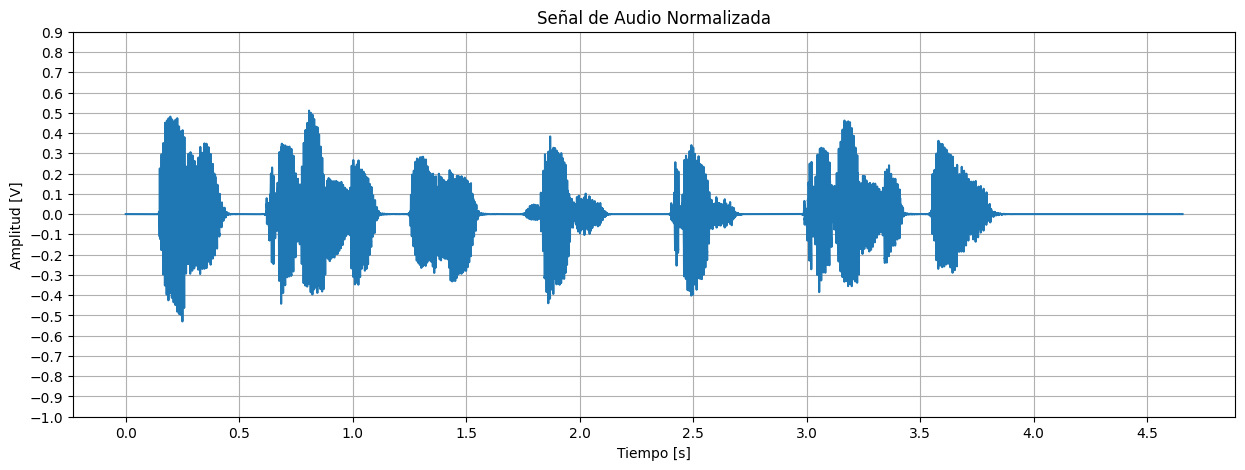

In [14]:
# Normalizamos entre -1 y 1
#astype() convierte los elementos del arreglo (int16) en float32 y luego dividimos en 32768
audio_normalizado = audio.astype(np.float32) / 32768  

#Graficamos la señal de audio normalizada 
plt.figure(figsize=(15,5))
plt.plot(t_audio,audio_normalizado)
plt.title("Señal de Audio Normalizada")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.yticks(np.arange(-1,1,0.1))
plt.xticks(np.arange(0,5,0.5))
plt.grid(True)
plt.show()

# Valor Medio , Valor Eficaz y Potencia Normalizada de la señal de audio Normalizada

In [22]:
Audio_med = np.mean(audio_normalizado)
print("El valor medio es: ", round(Audio_med,6))
Audio_ms = np.mean(audio_normalizado**2)
print("El valor cuadratico medio es: ", Audio_ms)
Audio_rms = np.sqrt(Audio_ms)
print("El valor eficaz es: ", round(Audio_rms,4))


El valor medio es:  2e-06
El valor cuadratico medio es:  0.006607961
El valor eficaz es:  0.0813


# FFT de la señal de audio

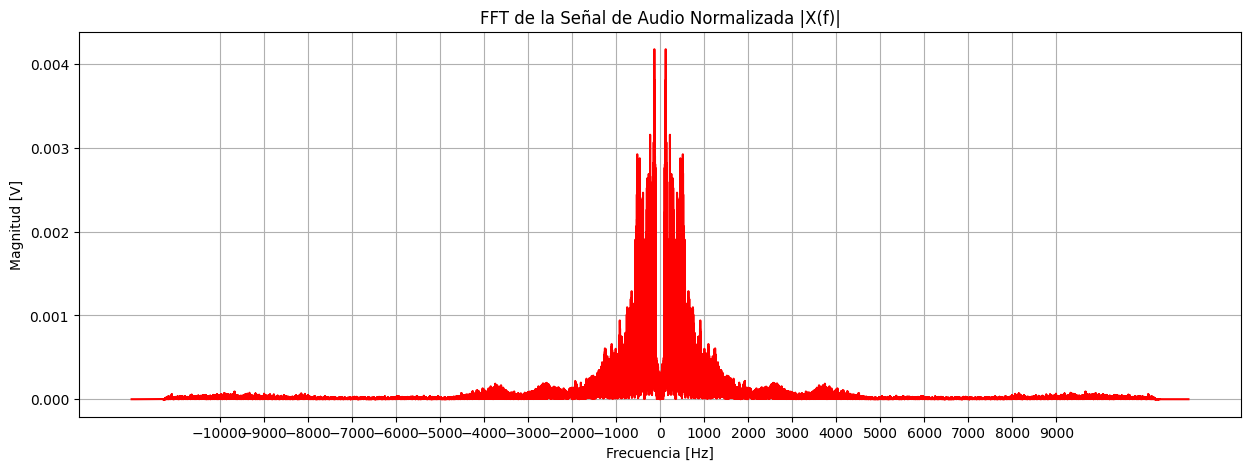

In [19]:
#Graficamos el espectro de la señal de audio 
import modules.caracteristicas 
reload(modules.caracteristicas)
from modules.caracteristicas import Audio_FFT
#FFT_Audio,eje_frec_audio = Audio_FFT(ruta)

FFT_Audio_Normalizada = np.fft.fftshift(np.fft.fft(audio_normalizado))
f_Audio_Normalizada = np.fft.fftshift(np.fft.fftfreq(len(audio_normalizado),d=1/24000))

plt.figure(figsize=(15,5))
plt.plot(f_Audio_Normalizada,np.abs(FFT_Audio_Normalizada/len(audio_normalizado)),'red')
plt.title("FFT de la Señal de Audio Normalizada |X(f)|")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [V]")
plt.grid(True)
plt.xticks(np.arange(-10e3,10e3,1e3))
plt.show()


# Espectro de densidad de energia de la señal de audio

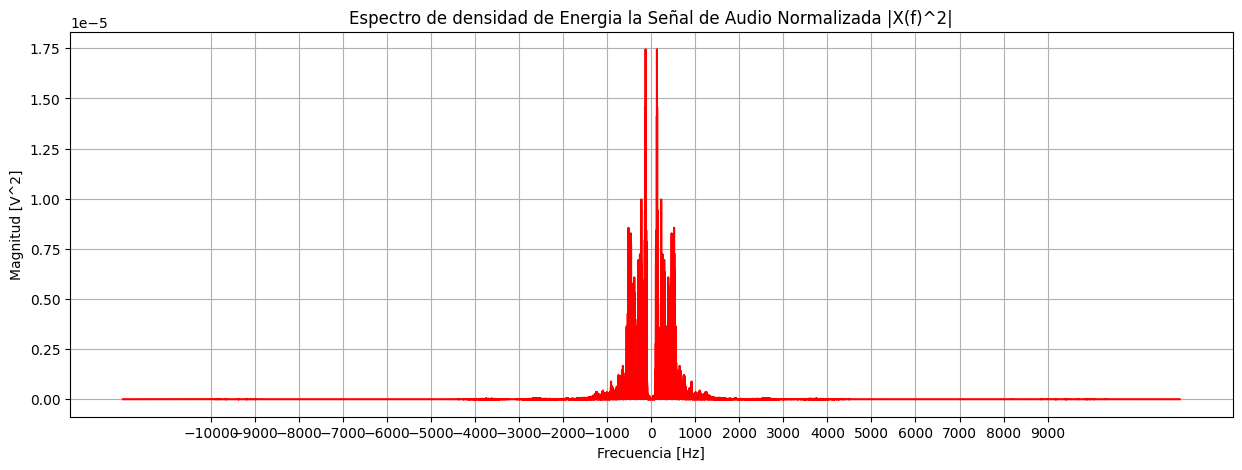

In [28]:
# Calculamos el espectro de densidad de energia 
Energia_Espectro_Audio = (np.abs(FFT_Audio_Normalizada/len(FFT_Audio_Normalizada)))**2

#Graficamos 
plt.figure(figsize=(15,5))
plt.plot(f_Audio_Normalizada,Energia_Espectro_Audio,'red')
plt.title("Espectro de densidad de Energia la Señal de Audio Normalizada |X(f)^2|")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [V^2]")
plt.grid(True)
plt.xticks(np.arange(-10e3,10e3,1e3))
plt.show()

# 95% de la energia 

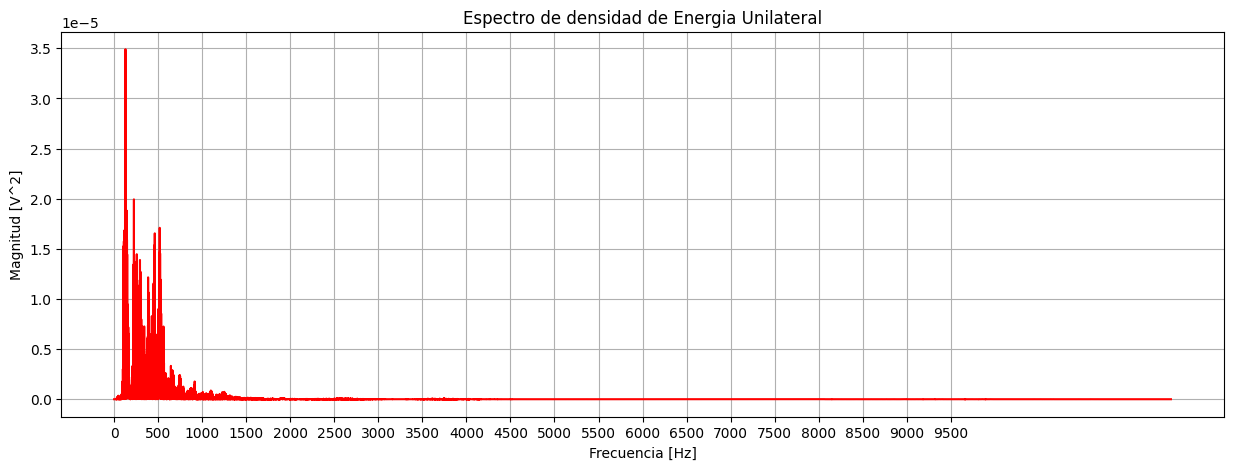

In [42]:
#Determinamos hasta que componente espectral se abarca el 95% de la señal 

#trabajamos con el espectro unilateral tal que:
Espectro_Unilateral_Energia = Energia_Espectro_Audio[len(Energia_Espectro_Audio)//2:].copy()
#[N/2:N/2] nos permite indicar la cantidad de elementos con la que trabajamos desde la mitad del arreglo

#Duplicamos el valor de las componentes 
Espectro_Unilateral_Energia[1:] *= 2

#Eje de frecuencias solo positivo 
f_unilateral = f_Audio_Normalizada[len(f_Audio_Normalizada)//2:]

#Graficamos 
plt.figure(figsize=(15,5))
plt.plot(f_unilateral,Espectro_Unilateral_Energia,'red')
plt.title("Espectro de densidad de Energia Unilateral")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [V^2]")
plt.grid(True)
plt.xticks(np.arange(0,10e3,500))
plt.show()

In [41]:
#Ahora determinamos el 95% de la Energia 
Energia_Total = np.sum(Espectro_Unilateral_Energia)
#Normalizamos la energia 
Energia_Normalizada = Espectro_Unilateral_Energia/Energia_Total
#Buscamos la componente hasta la que contiene el 95% de energia 
Energia_Acumulada = np.cumsum(Energia_Normalizada)
#cumsum() calcula la suma acumulada del arreglo, el arreglo energia_acumualda[i] dice cuanta entergia hay desde la componente 0 hasta i
Energia_95 = np.where(Energia_Acumulada >= 0.95)[0][0]
#np.where() busca dentro del arreglo los indices en que se acumula el 95% de energia, [0] indica que detectara el primero en el que pase
Componente_Energia_95 = f_unilateral[Energia_95]
print("La componenten hasta la que se acumula el 95%' de energia de la señal es: ",np.round(Componente_Energia_95,2)) 

La componenten hasta la que se acumula el 95%' de energia de la señal es:  1047.47


Tomaremos como criterio para conocer la maxima frecuencia de la señal a la componente hasta la cual se abara un 95% de energia de la señal

# Filtro
La respuesta de un filtro pasabajos ideal al impulso es no causal, la idea seria aplicar un filtro fisicamente realizable.
Si lo vemos como un SLIT para transmision sin distorsion sabemos que la respuesta en magnitud debe ser constante y que la respuesta en fase lineal.
Sabemos que el 95% de la energia se contiene en el lobulo central y los dos lobulos laterales 

CONSULTAR

In [ ]:
#REALIZAMOS UN FILTRADO IDEAL POR EL MOMENTO 



# Muestreo
Por Teorema del muestreo regular de Nyquist tenemos que muestrear a una frecuencia por lo menos 2 veces mayor que la frecuencia maxima de la señal de interes 

La frecuencia de muestreo es:  3142.4


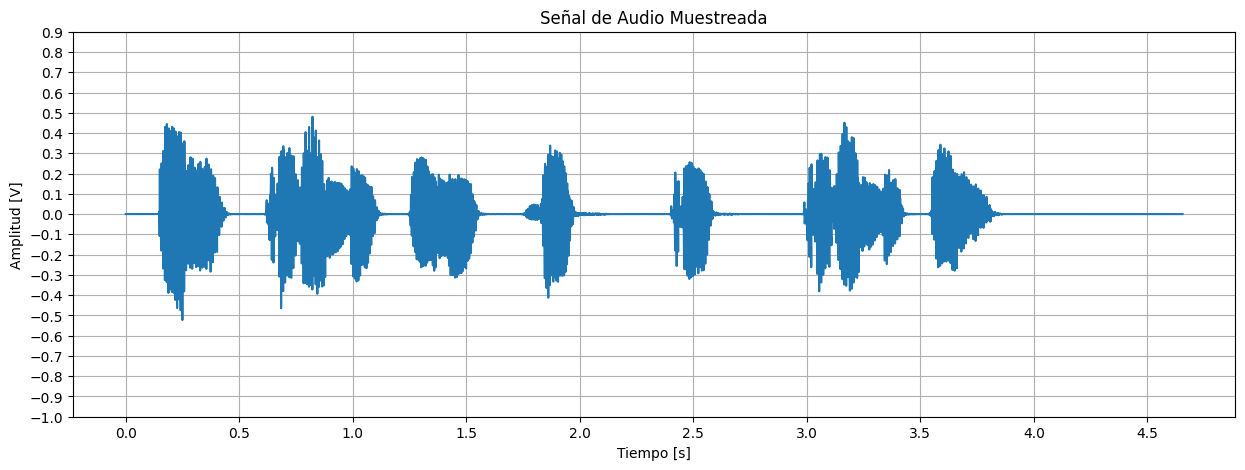

In [53]:
# Tomamos como criterio a muestrear por lo menos hasta 3 veces la fmax
fs = Componente_Energia_95 * 3  
print("La frecuencia de muestreo es: ",np.round(fs,2))

#En el archivo .wav la señal se encuentra muestreada a 24000Hz
fs_original = 24000

# Utilizaremos un funcion que permite remuestrear la señal 
# resample.poly() se encarga de interpolar, filtrar para evitar aliasing y decimar 
# Decimar implica reducir la tasa de muestreo 
# resample() asume que la señal es peridoica y usa la FFT para interpolar - distinto a resample.poly
from scipy.signal import resample_poly, firwin, lfilter

Audio_Muestreada = resample_poly(audio_normalizado,up=int(fs),down=fs_original)

t_audio_muestreada = np.arange(len(Audio_Muestreada)) / fs

#Graficamos 
plt.figure(figsize=(15,5))
plt.plot(t_audio_muestreada,Audio_Muestreada)
plt.title("Señal de Audio Muestreada")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.yticks(np.arange(-1,1,0.1))
plt.xticks(np.arange(0,5,0.5))
plt.grid(True)
plt.show()

# Cuantificacion 
Sabemos que la cantidad de niveles depende de la cantidad de bits:  M=2^n. 

Conociendo el rango de niveles de tension de la señal y los niveles podemos determinar la resolucion: Res = (Vmax-Vmin)/M 

Ademas debemos conocer la SNR para poder determinar la cantidad de bits necesaria, ya que de aqui determinaremos el Error de Cuantificacion

In [66]:
# Conocemos la Potencia Normalizada de la señal de audio 
print("El valor de la potencia normalizada de la señal es:",Audio_ms)
# Elegimos que la SNRo>30[dB]
Pot_N = Audio_ms/1000
print("La potencia de ruido en la entrada es: ",Pot_N)
print("La magnitud de ruido esta dada por: ",np.sqrt(Pot_N))

#Sabemos que es igual al valor eficaz del ruido de cuantificacion
# N_cuantif_rms = Res / np.sqrt(12)
N_cuantif_rms = np.sqrt(Pot_N)
Res = N_cuantif_rms * np.sqrt(12) 
print("La resolucion es: ",np.round(Res,5))

#Sabemos que la resolucion es Res = (Vmax-Vmin)/M 
n = (1/np.log(2))*np.log(1/Res)
print("La cantidad de bits necesarios para mantener una SNRo=30dB es: ",np.round(n,0))

El valor de la potencia normalizada de la señal es: 0.006607961
La potencia de ruido en la entrada es:  6.607961e-06
La magnitud de ruido esta dada por:  0.0025705954
La resolucion es:  0.0089
La cantidad de bits necesarios para mantener una SNRo=30dB es:  7.0


Aproximamos a 7 bits o 6 bits segun convenga 

La cantidad de niveles es:  128.0
Resolucion:  0.0078125


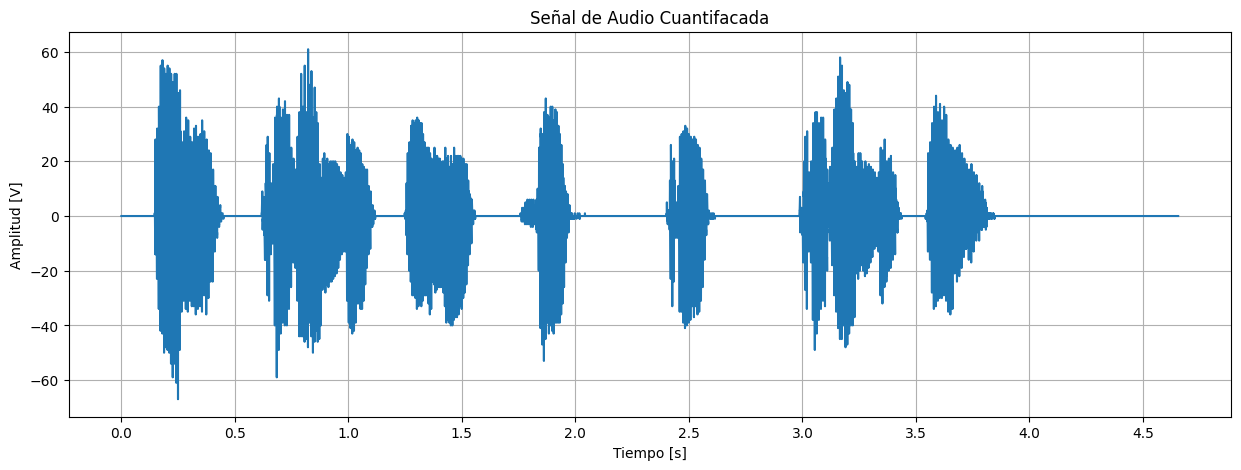

In [84]:
# Caclulamos la cantidad de niveles
M = 2 ** np.round(n,0)
print("La cantidad de niveles es: ",M)
# Calculamos la resolucion 
Res = 1/M
print("Resolucion: ",Res)

#Cuantificacion
Audio_Cuantificada = np.round((Audio_Muestreada)/Res)

#Graficamos 
plt.figure(figsize=(15,5))
plt.plot(t_audio_muestreada,Audio_Cuantificada)
#plt.plot(t_audio_muestreada,Audio_Muestreada,'red')
plt.title("Señal de Audio Cuantifacada")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
#plt.yticks(np.arange(-1,1,0.1))
plt.xticks(np.arange(0,5,0.5))
plt.grid(True)
plt.show()

# Codificacion 

Sabemos que la velocidad de transmision minima teorica esta dada por Rb = n fs

Entonces debemos codificar la señal cuantificada, es decir, generar un arreglo de datos binarios y transmitirlos a Rb


In [ ]:
# Convertimos el arreglo de datos cuantificado en un arreglo con cadenas de datos binarios
# Dado que tenemos que la cuantificacion va desde -64 a 63, tenemos un caso de 7 bits con signo   
Audio_Cuantificada = np.array(Audio_Cuantificada,dtype=np.int8)
Audio_bin = [format(x & 0x7F,'07b') for x in Audio_Cuantificada]
#Convertimos cada cadena binaria a una arreglo de bits 
Audio_bits = np.array([int(bit) for byte in Audio_bin for bit in byte],dtype=np.uint8)

In [97]:
#Determinamos Rb
Rb = n * fs
print("Rb = ",np.round(Rb,3),"bps")
Tb = 1/Rb
print("El ancho de cada bits es: ",np.round(Tb,7),"[s]")

Rb =  21403.495 bps
El ancho de cada bits es:  4.67e-05 [s]


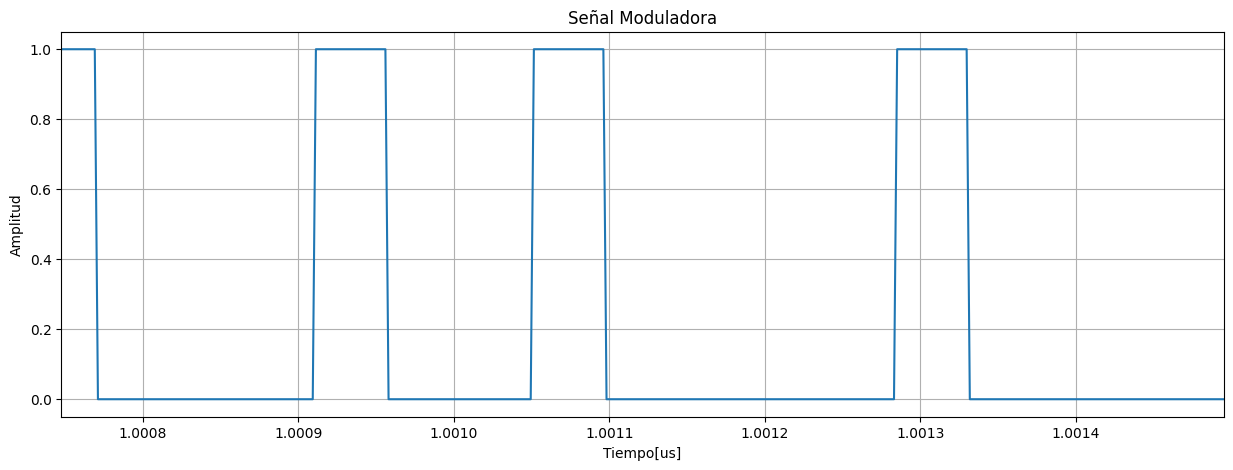

In [101]:
#Necesitamos tambien la cantidad de puntos por bit 

fs_2 = 50e4 #[Hz] 
muestras_por_bit = int(fs_2*Tb) #Cantidad de puntos a graficar por bit 
N_2 = fs_2 * len(Audio_bits)*Tb
#Generamos el arreglo del tren de pulsos

#la funcion np.repeat() permite repetir cada elemento del arreglo la cantidad de veces que se indica 
Senial_Moduladora = np.repeat(Audio_bits,muestras_por_bit)
#generamos el eje de tiempo de la señal
t_moduladora = np.linspace(start=0,stop= len(Audio_bits)*Tb,num=len(Senial_Moduladora),endpoint=False)

#Graficamos la señal 
plt.figure(figsize=(15,5))
plt.plot(t_moduladora,Senial_Moduladora)
plt.grid(True)
plt.xlim(1+Tb*16,1+Tb*32)
#plt.xticks(np.arange(1+Tb*16,1+Tb*32,Tb))
plt.title("Señal Moduladora")
plt.xlabel("Tiempo[us]")
plt.ylabel("Amplitud")

plt.show()

# Señal Portadora

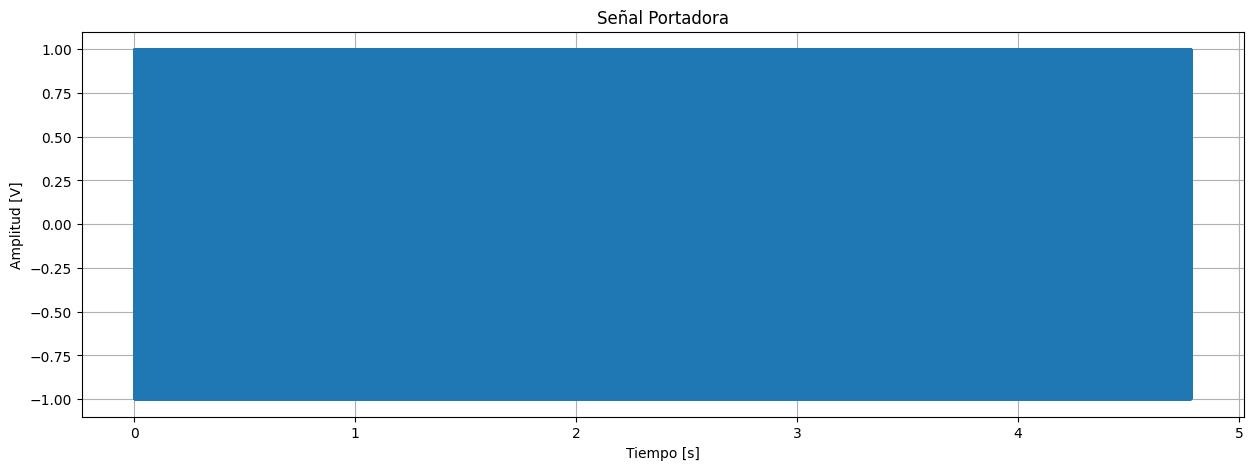

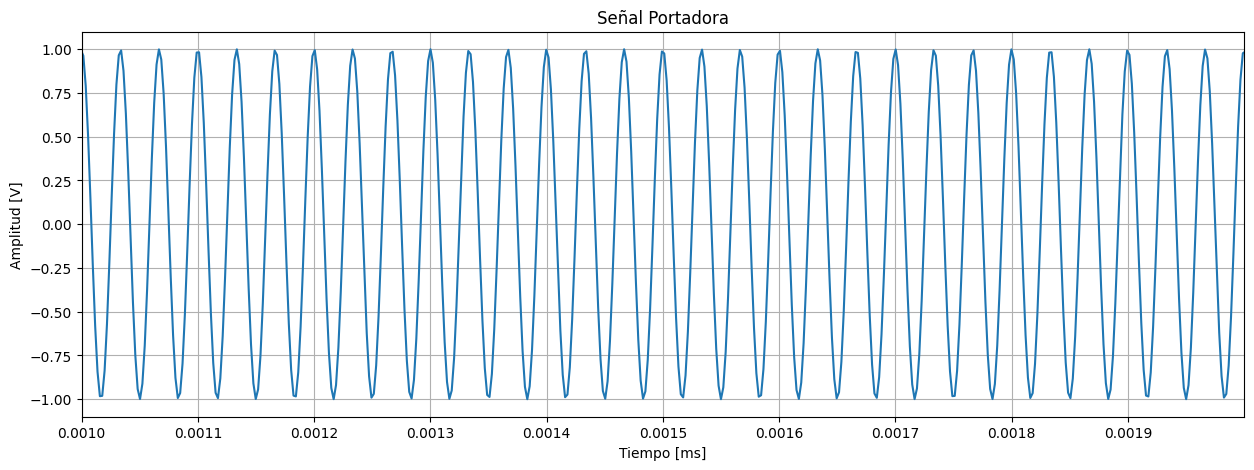

In [110]:
from math import pi  
#Generamos una señal de portadora sinusoidal con una frecuencia de 10kHz y la misma duracion que la señal de audio

Amplitud = 1 #[V]
frecuencia_portadora = 30000 #[Hz]
duracion_portadora = 4.66 #[s]
frecuencia_muestreo = 50e4 #Hz
Cantidad_Puntos = frecuencia_muestreo * duracion_portadora #[Hz]

#Eje de tiempo 
t_portadora = np.linspace(start=0,stop=duracion_portadora,num=int(Cantidad_Puntos),endpoint=False)
#Endpoint=false para que no interprete el comienzo de un nuevo periodo en ese punto 

#Señal sen 
Cos_Portadora = Amplitud * np.cos(2 * frecuencia_portadora * t_moduladora * pi)

#graficamos la señal
plt.figure(figsize=(15,5))
plt.plot(t_moduladora,Cos_Portadora)
plt.title("Señal Portadora")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid(True)
plt.show()

#graficamos una parte de la señal para visualizar mejor
plt.figure(figsize=(15,5))
plt.plot(t_moduladora,Cos_Portadora)
plt.xlim(0.001,0.002)
plt.xticks(np.arange(0.001,0.002,0.0001))
plt.title("Señal Portadora")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud [V]")
plt.grid(True)
plt.show()

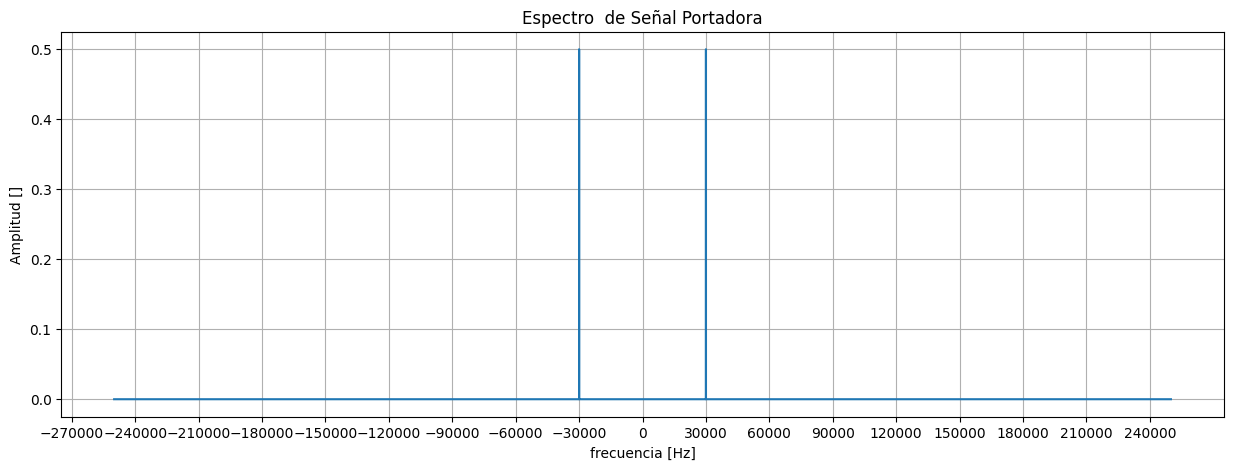

In [108]:
# realizamos la operacion de FFT de la libreria "np"
FFT_Cos_Portadora = np.fft.fft(Cos_Portadora)
# Centramos y normalizamos 
FFT_Cos_Portadora_Shift = np.fft.fftshift(FFT_Cos_Portadora/int(Cantidad_Puntos))
# Definimos el eje de frecuencias 
# fftfreq(cantidad_de_puntos_total_int,espacio_entre_muestras)
eje_f_FFT = np.fft.fftshift( np.fft.fftfreq(int(Cantidad_Puntos),d=1/frecuencia_muestreo))

#graficamos el espectro 

plt.figure(figsize=(15,5))
plt.plot(eje_f_FFT,np.abs(FFT_Cos_Portadora_Shift))
plt.title("Espectro  de Señal Portadora")
plt.xlabel("frecuencia [Hz]")
plt.ylabel("Amplitud []")
plt.xticks(np.arange(-270e3,270e3,30e3))
plt.grid(True)
plt.show()

# Modulacion 
Sabemos que es un tipo de modulacion de amplitud donde tenemos:
- Señal moduladora digital: Señal de audio codificada --> Señal de banda base unipolar 
- Señal Portadora Analogica:  Sinusoidal con frecuencia de 10kHz

Sabemos que podemos realizar la modulacion con un modulador balanceado que realice el producto entre las dos señales

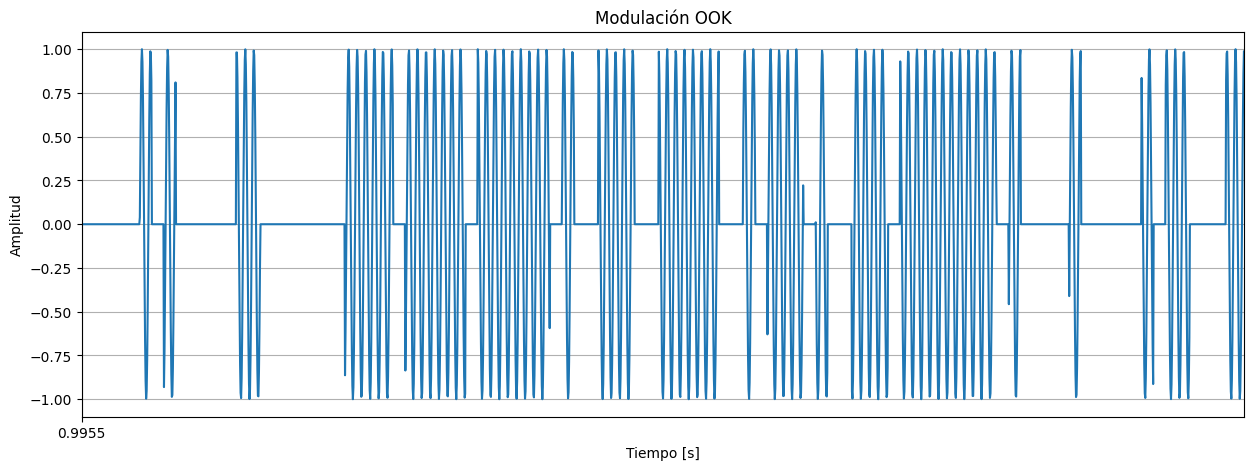

In [122]:
# El modulador balanceado lo que hace es realizar el producto en el tiempo de las dos señales, por teorema de convolucion, en la frecuencia
# realiza la convolucion de los espectros de las señales 

#Si tenemos un arreglo de bits que representa la señal moduladora y una señal portadora de 10kHz coseniodal 

Senial_OOK = Senial_Moduladora * Cos_Portadora

#Graficamos la señal 

plt.figure(figsize=(15,5))
plt.plot(t_moduladora, Senial_OOK)  # solo primeros 1000 puntos para visualizar bien
plt.grid(True)
plt.title("Modulación OOK")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0.9955,1)
plt.xticks(np.arange(0.9955,1,0.1))
plt.show()

# Archivo con la señal modulada

In [123]:
# un archivo .npz es un archivo comprimido de Numpy y permite guardar arreglos con sus nombres 
# queremos guardar dos arreglos, el eje de tiempos (o la cantidad de elementos), y la amplitud de la señal OOK
np.savez('Senial_OOK.npz',tiempo=t_moduladora,Amplitud=Senial_OOK) 